## En esta libreta se van a analizar los datos recopilados a lo largo de la pandemia. Para desarrollar una reflexión crítica contrastaremos el comportamiento "real" de la pandemia con el coportamiento que se estima a través del modelo SIR. Con base en dicho contraste se podrá evaluar críticamente la efectividad de las medidas adoptadas por el gobierno para la Ciudad de México.

In [2]:
#Importamos la librería pandas para manipular los datos
import pandas as pd

## Descargamos los datos del número de contagios de la página oficial: https://datos.covid-19.conacyt.mx/

In [3]:
contagios = pd.read_csv('Casos_Diarios_Estado_Nacional_Confirmados_20230625.csv')
contagios.head(10)

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,15-06-2023,16-06-2023,17-06-2023,18-06-2023,19-06-2023,20-06-2023,21-06-2023,22-06-2023,23-06-2023,24-06-2023
0,1,1434635,AGUASCALIENTES,0,0,0,0,0,0,0,...,2,3,0,0,4,3,2,5,0,0
1,2,3634868,BAJA CALIFORNIA,0,0,0,0,0,0,0,...,23,22,0,2,25,27,24,19,6,0
2,3,804708,BAJA CALIFORNIA SUR,0,0,0,0,0,0,0,...,6,3,0,0,5,2,6,2,3,0
3,4,1000617,CAMPECHE,0,0,0,0,0,0,0,...,8,7,0,7,2,3,2,0,7,0
4,7,5730367,CHIAPAS,0,0,0,1,0,0,0,...,6,5,0,0,7,9,8,4,3,0
5,8,3801487,CHIHUAHUA,0,0,0,0,0,0,0,...,6,16,0,0,11,9,7,8,2,0
6,9,9018645,DISTRITO FEDERAL,0,2,0,0,0,0,1,...,69,54,17,23,94,74,77,79,37,4
7,5,3218720,COAHUILA,0,0,1,0,0,0,1,...,4,3,0,1,6,8,4,5,2,0
8,6,785153,COLIMA,0,0,0,0,0,0,0,...,5,4,0,1,13,7,17,6,8,0
9,10,1868996,DURANGO,0,0,0,0,0,0,0,...,4,5,3,1,2,1,7,5,3,0


## Los datos vienen distribuídos por estado indicando el número de contagios para cada día. Dado que en este trabajo únicamente trabajaremos con los datos de la Ciudad de México, vamos a filtrar el renglón "Distrito Federal"

In [4]:
contCDMX = contagios[contagios.nombre == 'DISTRITO FEDERAL']
contCDMX.head()

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,15-06-2023,16-06-2023,17-06-2023,18-06-2023,19-06-2023,20-06-2023,21-06-2023,22-06-2023,23-06-2023,24-06-2023
6,9,9018645,DISTRITO FEDERAL,0,2,0,0,0,0,1,...,69,54,17,23,94,74,77,79,37,4


## Cargamos los datos en una lista directamente del DataFrame "contagios"

In [5]:
row_list = contagios.loc[6, :].values.flatten().tolist()
contagiosCDMX = []
for i in range(0,len(row_list)-3):
    contagiosCDMX.append(row_list[i+3])

print(contagiosCDMX)

[0, 2, 0, 0, 0, 0, 1, 3, 5, 1, 2, 3, 2, 3, 16, 23, 26, 23, 10, 28, 35, 31, 64, 36, 22, 16, 46, 62, 46, 71, 63, 62, 39, 82, 58, 70, 85, 99, 64, 59, 141, 144, 140, 150, 174, 127, 125, 293, 267, 256, 269, 354, 213, 215, 506, 485, 466, 418, 571, 312, 283, 550, 619, 655, 609, 408, 381, 350, 792, 648, 741, 782, 855, 451, 419, 879, 881, 925, 851, 1012, 640, 416, 1134, 1079, 1095, 1017, 971, 524, 399, 1092, 954, 1021, 864, 980, 571, 448, 1118, 948, 1016, 951, 985, 558, 413, 1057, 1017, 974, 900, 936, 427, 360, 945, 1008, 975, 956, 899, 469, 298, 904, 901, 837, 855, 939, 384, 343, 983, 942, 1028, 888, 953, 395, 253, 1009, 964, 963, 760, 885, 425, 272, 1083, 938, 1234, 1150, 1196, 673, 277, 1167, 1174, 1218, 1128, 1081, 568, 272, 1074, 1084, 1097, 1067, 951, 554, 274, 880, 1045, 1033, 928, 1006, 481, 203, 905, 1049, 1042, 1019, 1051, 485, 198, 1020, 1201, 1145, 985, 1099, 520, 291, 1104, 1096, 1465, 1280, 1307, 748, 265, 1074, 1456, 1501, 1382, 1260, 674, 265, 1009, 1397, 1342, 1240, 1215, 750, 

In [6]:
len(contagiosCDMX)

1215

In [7]:
#Vamos a crear también una lista de las fechas en que corresponde el número de contagios registrados
import datetime

# vamos a crear una lista que contiene fechas del 26/02/2020 al 24/06/2023
ini = datetime.datetime(2020,2,26)
end = datetime.datetime(2023,6,24)
step = datetime.timedelta(days=1)

# llenado (populate) de la lista
fechas=[]
while ini <= end:
    fechas.append(ini.strftime('%d-%m-%y'))
    ini += step
    
fechas

['26-02-20',
 '27-02-20',
 '28-02-20',
 '29-02-20',
 '01-03-20',
 '02-03-20',
 '03-03-20',
 '04-03-20',
 '05-03-20',
 '06-03-20',
 '07-03-20',
 '08-03-20',
 '09-03-20',
 '10-03-20',
 '11-03-20',
 '12-03-20',
 '13-03-20',
 '14-03-20',
 '15-03-20',
 '16-03-20',
 '17-03-20',
 '18-03-20',
 '19-03-20',
 '20-03-20',
 '21-03-20',
 '22-03-20',
 '23-03-20',
 '24-03-20',
 '25-03-20',
 '26-03-20',
 '27-03-20',
 '28-03-20',
 '29-03-20',
 '30-03-20',
 '31-03-20',
 '01-04-20',
 '02-04-20',
 '03-04-20',
 '04-04-20',
 '05-04-20',
 '06-04-20',
 '07-04-20',
 '08-04-20',
 '09-04-20',
 '10-04-20',
 '11-04-20',
 '12-04-20',
 '13-04-20',
 '14-04-20',
 '15-04-20',
 '16-04-20',
 '17-04-20',
 '18-04-20',
 '19-04-20',
 '20-04-20',
 '21-04-20',
 '22-04-20',
 '23-04-20',
 '24-04-20',
 '25-04-20',
 '26-04-20',
 '27-04-20',
 '28-04-20',
 '29-04-20',
 '30-04-20',
 '01-05-20',
 '02-05-20',
 '03-05-20',
 '04-05-20',
 '05-05-20',
 '06-05-20',
 '07-05-20',
 '08-05-20',
 '09-05-20',
 '10-05-20',
 '11-05-20',
 '12-05-20',

In [8]:
len(fechas)

1215

In [9]:
#Estas son para poner en el eje x. Las fechas las encima
cont = 0
xs=[]
for i in fechas:
    xs.append(cont)
    cont = cont + 1
    
xs

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [10]:
#Para graficar los datos, necesitamos de la librería mathplotlib
import matplotlib as plt
import matplotlib.pyplot as plt

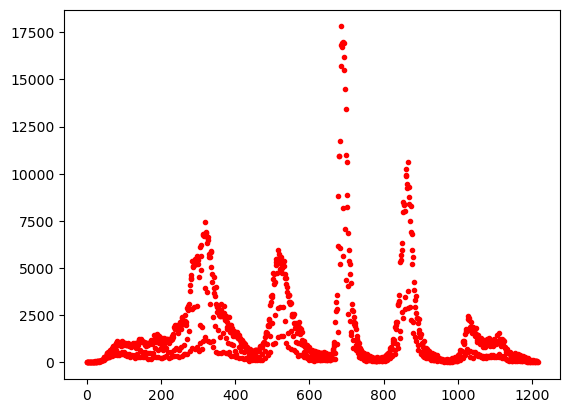

In [11]:
#Graficamos el número de contagios. En el eje x se indica el número de días
plt.scatter(xs, contagiosCDMX,marker='.', c='red')
plt.show()
#plt.plot(contagiosCDMX)

## Según el "Informe Integral de COVID-19 en México". Número 06-2022 correspondiente al 4 de mayo del 2022, se pueden identificar 4 "olas" de COVID.

## La primer ola va de la semana epidemiológica 08 del 2020 (16 de febrero del 2020) a la semana epidemiológica 39 del 2020 (26 de septiembre del 2020)

In [12]:
ini = datetime.datetime(2020,2,26)
OlaPrimerafechas=[]

while ini <= datetime.datetime(2020,9,26):
    OlaPrimerafechas.append(ini.strftime('%d-%m-%y'))
    ini += step
    
OlaPrimerafechas

['26-02-20',
 '27-02-20',
 '28-02-20',
 '29-02-20',
 '01-03-20',
 '02-03-20',
 '03-03-20',
 '04-03-20',
 '05-03-20',
 '06-03-20',
 '07-03-20',
 '08-03-20',
 '09-03-20',
 '10-03-20',
 '11-03-20',
 '12-03-20',
 '13-03-20',
 '14-03-20',
 '15-03-20',
 '16-03-20',
 '17-03-20',
 '18-03-20',
 '19-03-20',
 '20-03-20',
 '21-03-20',
 '22-03-20',
 '23-03-20',
 '24-03-20',
 '25-03-20',
 '26-03-20',
 '27-03-20',
 '28-03-20',
 '29-03-20',
 '30-03-20',
 '31-03-20',
 '01-04-20',
 '02-04-20',
 '03-04-20',
 '04-04-20',
 '05-04-20',
 '06-04-20',
 '07-04-20',
 '08-04-20',
 '09-04-20',
 '10-04-20',
 '11-04-20',
 '12-04-20',
 '13-04-20',
 '14-04-20',
 '15-04-20',
 '16-04-20',
 '17-04-20',
 '18-04-20',
 '19-04-20',
 '20-04-20',
 '21-04-20',
 '22-04-20',
 '23-04-20',
 '24-04-20',
 '25-04-20',
 '26-04-20',
 '27-04-20',
 '28-04-20',
 '29-04-20',
 '30-04-20',
 '01-05-20',
 '02-05-20',
 '03-05-20',
 '04-05-20',
 '05-05-20',
 '06-05-20',
 '07-05-20',
 '08-05-20',
 '09-05-20',
 '10-05-20',
 '11-05-20',
 '12-05-20',

In [13]:
len(OlaPrimerafechas)

214

In [14]:
#Estas son para poner en el eje x. Las fechas las encima
cont = 0
xs1=[]
for i in OlaPrimerafechas:
    xs1.append(cont)
    cont = cont + 1
    
xs1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [15]:
#Hacemos una lista del número de contagios durante la primera ola de COVID-19
contCDMX_OlaPrimera = []
for i in range(0,len(OlaPrimerafechas)):
    contCDMX_OlaPrimera.append(contagiosCDMX[i])

contCDMX_OlaPrimera

[0,
 2,
 0,
 0,
 0,
 0,
 1,
 3,
 5,
 1,
 2,
 3,
 2,
 3,
 16,
 23,
 26,
 23,
 10,
 28,
 35,
 31,
 64,
 36,
 22,
 16,
 46,
 62,
 46,
 71,
 63,
 62,
 39,
 82,
 58,
 70,
 85,
 99,
 64,
 59,
 141,
 144,
 140,
 150,
 174,
 127,
 125,
 293,
 267,
 256,
 269,
 354,
 213,
 215,
 506,
 485,
 466,
 418,
 571,
 312,
 283,
 550,
 619,
 655,
 609,
 408,
 381,
 350,
 792,
 648,
 741,
 782,
 855,
 451,
 419,
 879,
 881,
 925,
 851,
 1012,
 640,
 416,
 1134,
 1079,
 1095,
 1017,
 971,
 524,
 399,
 1092,
 954,
 1021,
 864,
 980,
 571,
 448,
 1118,
 948,
 1016,
 951,
 985,
 558,
 413,
 1057,
 1017,
 974,
 900,
 936,
 427,
 360,
 945,
 1008,
 975,
 956,
 899,
 469,
 298,
 904,
 901,
 837,
 855,
 939,
 384,
 343,
 983,
 942,
 1028,
 888,
 953,
 395,
 253,
 1009,
 964,
 963,
 760,
 885,
 425,
 272,
 1083,
 938,
 1234,
 1150,
 1196,
 673,
 277,
 1167,
 1174,
 1218,
 1128,
 1081,
 568,
 272,
 1074,
 1084,
 1097,
 1067,
 951,
 554,
 274,
 880,
 1045,
 1033,
 928,
 1006,
 481,
 203,
 905,
 1049,
 1042,
 1019,
 

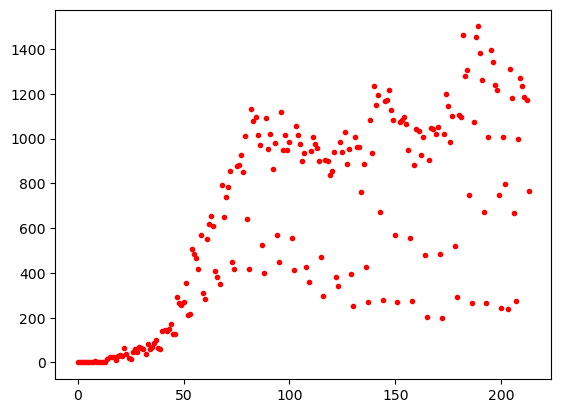

In [16]:
plt.scatter(xs1, contCDMX_OlaPrimera,marker='.', c='red')
plt.show()

#plt.plot(contCDMX_OlaPrimera)


## Implementación del Modelo SIR

In [17]:
from numpy import zeros, linspace
import matplotlib.pyplot as plt

## El modelo SIR consiste de un sistema de ecuaciones en diferencias https://es.wikipedia.org/wiki/Modelo_SIR
## $S^{n+1} = S^n - βΔtS^nI^n$
## $I^{n+1} = I^n + βΔtS^nI^n - \gamma \Delta t I^n$
## $R^{n+1} = R^n + \gamma \Delta t I^n$

In [18]:
#Hacemos una función para calcular los parámetros β y γ

def constanteBeta(N,T,S0,I0):
    constB = N/(T*S0*I0)
    return constB

def constanteGama(N,T,S0,I0,B):
    constG = ((N-I0)-(B*T*S0*I0))/(-T*I0)
    return constG

In [19]:
# Nuestra unidad de tiempo a 1 día
dt = 1
D = 214 # Simulamos para 214 días

t = linspace(0, D*dt, D+1)
S = zeros(D+1)
I = zeros(D+1)
R = zeros(D+1)

# Condiciones Iniciales
S[0] = 9018645 #Población de la CDMX 
I[0] = 1
R[0] = 0

In [20]:
#Parámetros en el modelo SIR

sumita = 0
for i in range(15):
    sumita = sumita + contCDMX_OlaPrimera[i]

promedio = sumita/15

beta = constanteBeta(promedio, 15,S[0],I[0])
gamma = constanteGama(promedio, 15,S[0],I[0],beta)


#beta = constanteBeta(contCDMX_OlaPrimera[15], 15,S[0],I[0])
#gamma = constanteGama(contCDMX_OlaPrimera[15], 15,S[0],I[0],beta)

beta

1.8726636749632443e-08

In [21]:
gamma

0.06666666666666667

In [22]:
# Completamos los valores para las funciones S,I,R
for n in range(D):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

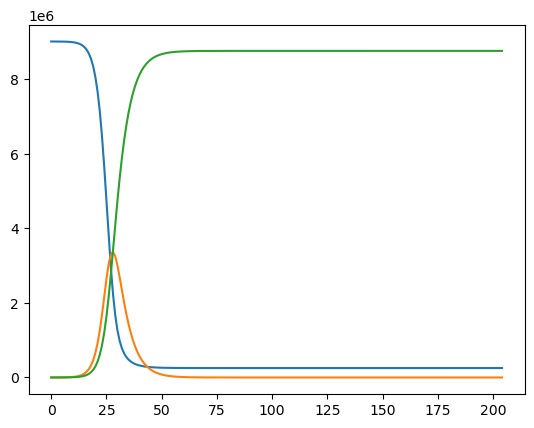

In [42]:
#Graficamos las funciones

fig = plt.figure()
l1, l2, l3= plt.plot(t, S, t, I, t, R)
#fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')
#plt.xlabel('días')
plt.show()

## Segunda ola que va de la semana epidemiológica 40 del 2020 (27 de septiembre del 2020) a la semana epidemiológica 15 del 2021 (18 de abril del 2021)

In [24]:
ini = datetime.datetime(2020,9,27)
OlaSegundafechas=[]

while ini <= datetime.datetime(2021,4,18):
    OlaSegundafechas.append(ini.strftime('%d-%m-%y'))
    ini += step
    
OlaSegundafechas

['27-09-20',
 '28-09-20',
 '29-09-20',
 '30-09-20',
 '01-10-20',
 '02-10-20',
 '03-10-20',
 '04-10-20',
 '05-10-20',
 '06-10-20',
 '07-10-20',
 '08-10-20',
 '09-10-20',
 '10-10-20',
 '11-10-20',
 '12-10-20',
 '13-10-20',
 '14-10-20',
 '15-10-20',
 '16-10-20',
 '17-10-20',
 '18-10-20',
 '19-10-20',
 '20-10-20',
 '21-10-20',
 '22-10-20',
 '23-10-20',
 '24-10-20',
 '25-10-20',
 '26-10-20',
 '27-10-20',
 '28-10-20',
 '29-10-20',
 '30-10-20',
 '31-10-20',
 '01-11-20',
 '02-11-20',
 '03-11-20',
 '04-11-20',
 '05-11-20',
 '06-11-20',
 '07-11-20',
 '08-11-20',
 '09-11-20',
 '10-11-20',
 '11-11-20',
 '12-11-20',
 '13-11-20',
 '14-11-20',
 '15-11-20',
 '16-11-20',
 '17-11-20',
 '18-11-20',
 '19-11-20',
 '20-11-20',
 '21-11-20',
 '22-11-20',
 '23-11-20',
 '24-11-20',
 '25-11-20',
 '26-11-20',
 '27-11-20',
 '28-11-20',
 '29-11-20',
 '30-11-20',
 '01-12-20',
 '02-12-20',
 '03-12-20',
 '04-12-20',
 '05-12-20',
 '06-12-20',
 '07-12-20',
 '08-12-20',
 '09-12-20',
 '10-12-20',
 '11-12-20',
 '12-12-20',

In [25]:
len(OlaSegundafechas)

204

In [31]:
#Estas son para poner en el eje x. Las fechas las encima
cont = 0
xs2=[]
for i in OlaSegundafechas:
    xs2.append(cont)
    cont = cont + 1
    
xs2

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [32]:
#Hacemos una lista del número de contagios durante la segunda ola de COVID-19
contCDMX_OlaSegunda = []
for i in range(len(OlaPrimerafechas),len(OlaSegundafechas)+len(OlaPrimerafechas)):
    contCDMX_OlaSegunda.append(contagiosCDMX[i])

contCDMX_OlaSegunda

[318,
 1147,
 1243,
 1231,
 1192,
 1069,
 560,
 241,
 1047,
 1233,
 1247,
 1202,
 1210,
 557,
 311,
 1257,
 1382,
 1230,
 1350,
 1528,
 680,
 338,
 1876,
 1993,
 1753,
 1784,
 1894,
 789,
 330,
 1990,
 1928,
 1953,
 1708,
 1545,
 703,
 313,
 673,
 2171,
 2006,
 1966,
 1775,
 832,
 358,
 2420,
 2343,
 2144,
 2033,
 2033,
 935,
 442,
 459,
 2521,
 2174,
 2004,
 2158,
 1245,
 472,
 2878,
 2998,
 2768,
 2849,
 3117,
 1669,
 608,
 3781,
 4083,
 4402,
 4460,
 4654,
 2812,
 787,
 5355,
 5094,
 5081,
 5314,
 5173,
 2925,
 715,
 5455,
 5492,
 5220,
 5200,
 5631,
 2982,
 823,
 5581,
 5426,
 5243,
 4534,
 615,
 1970,
 1053,
 6136,
 6219,
 5657,
 4926,
 715,
 1897,
 1145,
 6835,
 6754,
 6679,
 6818,
 6738,
 3943,
 1353,
 7464,
 6933,
 6878,
 6636,
 6337,
 3748,
 1145,
 6656,
 6468,
 5774,
 5567,
 5592,
 3111,
 1090,
 5867,
 5888,
 5078,
 4679,
 4291,
 2410,
 805,
 1162,
 4520,
 3950,
 3685,
 3549,
 1936,
 548,
 4000,
 3125,
 3000,
 2683,
 2955,
 1730,
 518,
 2995,
 2831,
 2504,
 2438,
 2444,
 1375

In [33]:
len(contCDMX_OlaSegunda)


204

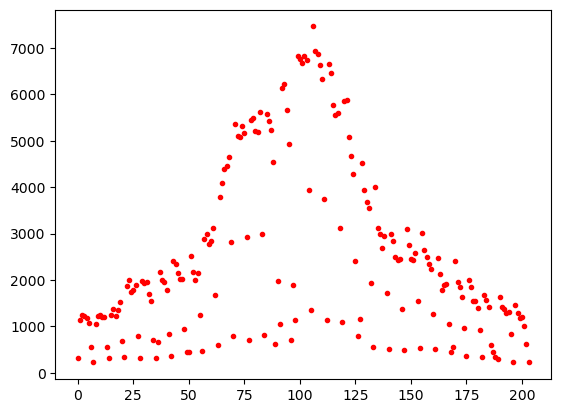

In [34]:
plt.scatter(xs2, contCDMX_OlaSegunda,marker='.', c='red')
plt.show()

#plt.plot(contCDMX_OlaSegunda)


## Calculamos la predicción basada en el modelo SIR¶

In [35]:
# Nuestra unidad de tiempo a 1 día
dt = 1
D = 204 # Simulamos para 214 días

t = linspace(0, D*dt, D+1)
S = zeros(D+1)
I = zeros(D+1)
R = zeros(D+1)

# Condiciones Iniciales
S[0] = 9018645-contCDMX_OlaSegunda[0] #Población de la CDMX 
I[0] = contCDMX_OlaSegunda[0]
R[0] = 0

In [39]:
#Parámetros en el modelo SIR

sumita = 0
for i in range(15):
    sumita = sumita + contCDMX_OlaSegunda[i]

promedio = sumita/15

beta = constanteBeta(promedio, 15,S[0],I[0])
gamma = constanteGama(promedio, 15,S[0],I[0],beta)


#beta = constanteBeta(contCDMX_OlaSegunda[5], 5,S[0],I[0])
#gamma = constanteGama(contCDMX_OlaSegunda[5], 5,S[0],I[0],beta)

beta

2.1399082925641302e-08

In [40]:
gamma

0.0666666666666667

In [43]:
# Completamos los valores para las funciones S,I,R
for n in range(D):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

C:\Users\Ricardo Yadel\AppData\Local\Temp\ipykernel_8396\506314310.py:5: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')


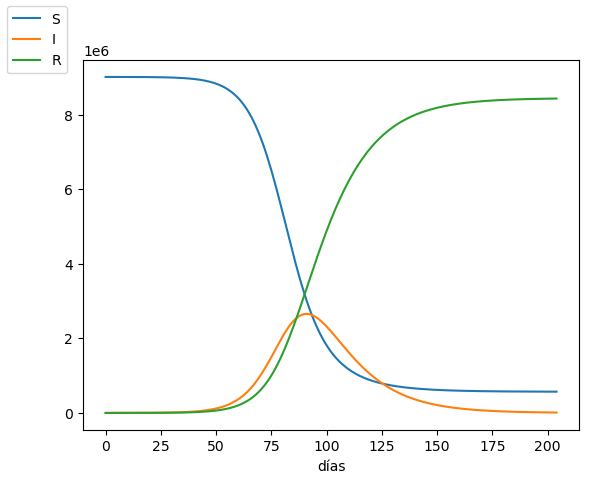

In [44]:
#Graficamos las funciones

fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')
plt.xlabel('días')
plt.show()

## Tercera ola que va de la semana epidemiológica 23 del 2021 (6 de junio del 2021) a la semana epidemiológica 42 del 2021 (23 de octubre del 2021)

In [45]:
ini = datetime.datetime(2021,6,6) #del 19 de abril al 6 de junio hay 48 días
#ini = datetime.datetime(2021,4,19)
OlaTercerafechas=[]

while ini <= datetime.datetime(2021,10,23):
    OlaTercerafechas.append(ini.strftime('%d-%m-%y'))
    ini += step
    
OlaTercerafechas

['06-06-21',
 '07-06-21',
 '08-06-21',
 '09-06-21',
 '10-06-21',
 '11-06-21',
 '12-06-21',
 '13-06-21',
 '14-06-21',
 '15-06-21',
 '16-06-21',
 '17-06-21',
 '18-06-21',
 '19-06-21',
 '20-06-21',
 '21-06-21',
 '22-06-21',
 '23-06-21',
 '24-06-21',
 '25-06-21',
 '26-06-21',
 '27-06-21',
 '28-06-21',
 '29-06-21',
 '30-06-21',
 '01-07-21',
 '02-07-21',
 '03-07-21',
 '04-07-21',
 '05-07-21',
 '06-07-21',
 '07-07-21',
 '08-07-21',
 '09-07-21',
 '10-07-21',
 '11-07-21',
 '12-07-21',
 '13-07-21',
 '14-07-21',
 '15-07-21',
 '16-07-21',
 '17-07-21',
 '18-07-21',
 '19-07-21',
 '20-07-21',
 '21-07-21',
 '22-07-21',
 '23-07-21',
 '24-07-21',
 '25-07-21',
 '26-07-21',
 '27-07-21',
 '28-07-21',
 '29-07-21',
 '30-07-21',
 '31-07-21',
 '01-08-21',
 '02-08-21',
 '03-08-21',
 '04-08-21',
 '05-08-21',
 '06-08-21',
 '07-08-21',
 '08-08-21',
 '09-08-21',
 '10-08-21',
 '11-08-21',
 '12-08-21',
 '13-08-21',
 '14-08-21',
 '15-08-21',
 '16-08-21',
 '17-08-21',
 '18-08-21',
 '19-08-21',
 '20-08-21',
 '21-08-21',

In [46]:
len(OlaTercerafechas)

140

In [50]:
#Estas son para poner en el eje x. Las fechas las encima
cont = 0
xs3=[]
for i in OlaTercerafechas:
    xs3.append(cont)
    cont = cont + 1
    
xs3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139]

In [47]:
#Hacemos una lista del número de contagios durante la Tercera ola de COVID-19
contCDMX_OlaTercera = []
for i in range(len(OlaSegundafechas)+48,len(OlaTercerafechas)+len(OlaSegundafechas)+48):
#for i in range(len(OlaSegundafechas),len(OlaTercerafechas)+len(OlaSegundafechas)):
    contCDMX_OlaTercera.append(contagiosCDMX[i])

contCDMX_OlaTercera

[2006,
 1966,
 1775,
 832,
 358,
 2420,
 2343,
 2144,
 2033,
 2033,
 935,
 442,
 459,
 2521,
 2174,
 2004,
 2158,
 1245,
 472,
 2878,
 2998,
 2768,
 2849,
 3117,
 1669,
 608,
 3781,
 4083,
 4402,
 4460,
 4654,
 2812,
 787,
 5355,
 5094,
 5081,
 5314,
 5173,
 2925,
 715,
 5455,
 5492,
 5220,
 5200,
 5631,
 2982,
 823,
 5581,
 5426,
 5243,
 4534,
 615,
 1970,
 1053,
 6136,
 6219,
 5657,
 4926,
 715,
 1897,
 1145,
 6835,
 6754,
 6679,
 6818,
 6738,
 3943,
 1353,
 7464,
 6933,
 6878,
 6636,
 6337,
 3748,
 1145,
 6656,
 6468,
 5774,
 5567,
 5592,
 3111,
 1090,
 5867,
 5888,
 5078,
 4679,
 4291,
 2410,
 805,
 1162,
 4520,
 3950,
 3685,
 3549,
 1936,
 548,
 4000,
 3125,
 3000,
 2683,
 2955,
 1730,
 518,
 2995,
 2831,
 2504,
 2438,
 2444,
 1375,
 495,
 3099,
 2761,
 2461,
 2438,
 2573,
 1540,
 541,
 3016,
 2647,
 2503,
 2353,
 2232,
 1278,
 506,
 2483,
 2126,
 1786,
 1887,
 1914,
 1055,
 458,
 553,
 2407,
 1965,
 1848,
 1626,
 963,
 362,
 1991,
 1851]

In [48]:
len(contCDMX_OlaTercera)

140

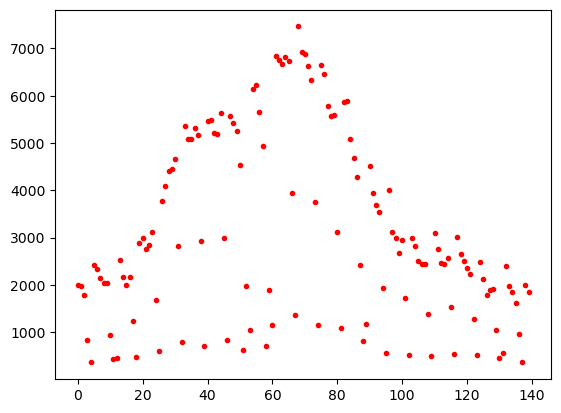

In [51]:
plt.scatter(xs3, contCDMX_OlaTercera,marker='.', c='red')
plt.show()

#plt.plot(contCDMX_OlaTercera)

## Calculamos la predicción basada en el modelo SIR

In [52]:
# Nuestra unidad de tiempo a 1 día
dt = 1
D = 140 # Simulamos para 214 días
#D=188

t = linspace(0, D*dt, D+1)
S = zeros(D+1)
I = zeros(D+1)
R = zeros(D+1)

# Condiciones Iniciales
S[0] = 9018645-contCDMX_OlaTercera[0] #Población de la CDMX 
I[0] = contCDMX_OlaTercera[0]
R[0] = 0


In [53]:
#Parámetros en el modelo SIR

sumita = 0
for i in range(15):
    sumita = sumita + contCDMX_OlaTercera[i]

promedio = sumita/15

beta = constanteBeta(promedio, 15,S[0],I[0])
gamma = constanteGama(promedio, 15,S[0],I[0],beta)


#beta = constanteBeta(contCDMX_OlaTercera[6], 6,S[0],I[0])
#gamma = constanteGama(contCDMX_OlaTercera[6], 6,S[0],I[0],beta)

beta

6.0056613879361876e-09

In [54]:
gamma

0.06666666666666667

In [55]:
# Completamos los valores para las funciones S,I,R
for n in range(D):
    S[n+1] = S[n] - dt*beta*S[n]*I[n]
    I[n+1] = I[n] + dt*beta*S[n]*I[n] - dt*gamma*I[n]
    R[n+1] = R[n] + dt*gamma*I[n]

C:\Users\Ricardo Yadel\AppData\Local\Temp\ipykernel_8396\506314310.py:5: MatplotlibDeprecationWarning: Passing the loc parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')


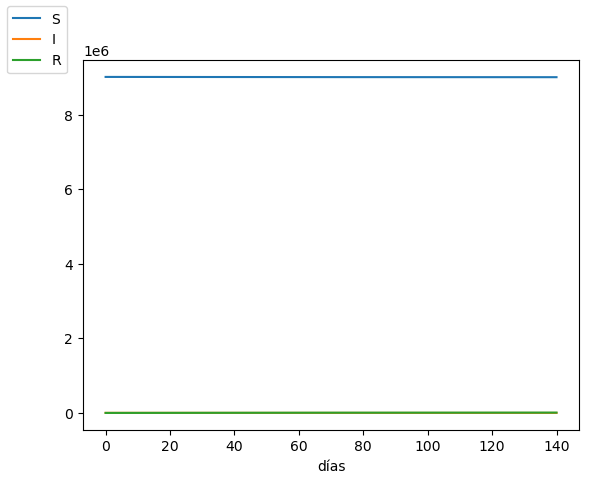

In [56]:
#Graficamos las funciones

fig = plt.figure()
l1, l2, l3 = plt.plot(t, S, t, I, t, R)
fig.legend((l1, l2, l3), ('S', 'I', 'R'), 'upper left')
plt.xlabel('días')
plt.show()